In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base=np.load('fit_exercise.npy')

Text(0.5,1,'datos')

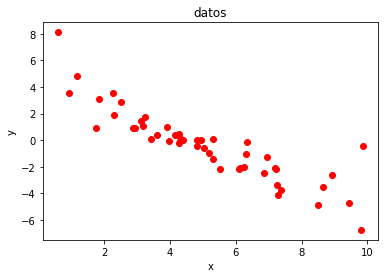

In [3]:
plt.plot(base[0],base[1],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('datos')


## aproximacion lineal (Regresión lineal)

In [4]:
var = np.vstack([base[0,:], np.ones(len(base[0,:]))]).T
m, c = np.linalg.lstsq(var, base[1,:], rcond=None)[0]
m, c

(-0.9821623517930426, 4.57785930375336)

Text(0,0.5,'y')

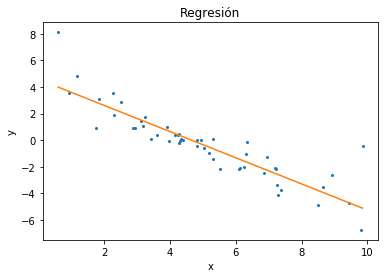

In [5]:
plt.plot(base[0,:], base[1,:], 'o', label='base', markersize=2)
plt.plot(base[0,:], m*base[0,:] + c, label='Regresión lineal')
plt.title('Regresión')
plt.xlabel('x')
plt.ylabel('y')

## Maximum Likelihood Method

Supongamos que se tienen n mediciones ($x_1, y_1\pm \sigma_1$; $x_2, y_2\pm \sigma_2$; $x_n, y_n\pm \sigma_n$) si se conoce la función de distribución entonces se conoce una relación funcional de $y=f(x,\alpha, \beta, \gamma, ...)$ donde $\alpha, \beta, \gamma, ...$ son parametros 

Likelihood Function es $$L=\prod_{i=1}^{n} f(x_i,\alpha, \beta, ...)$$

Usando un likelihood gausiano para una linea recta


$$L=\prod_{i=1}^{n} \frac{1}{\sigma_i\sqrt{2\pi}}exp({-\frac{(y_i- \lambda (x_i , \theta ))^2}{2\sigma_i^2}})$$
$$L=\prod_{i=1}^{n} \frac{1}{\sigma_i\sqrt{2\pi}}exp({-\frac{(y_i-\alpha-\beta x_i)^2}{2\sigma_i^2}})$$

$$ ln ({L}(x_i,y_i|\vec{\theta}))= \sum_{i}ln(\frac{1}{\sigma_i\sqrt{2\pi}}) -\frac{(y_i-\alpha-\beta x_i)^2 }{2\sigma_i^2}$$


Para maximizar la función obtenemos 

$$\frac{\partial}{\partial\alpha}ln(L)=\sum_{i}\frac{y_i-\alpha -\beta x_1}{\sigma_i^2}=0$$

$$\frac{\partial}{\partial\beta}ln(L)=\sum_{i}\frac{(y_i-\alpha -\beta x_1)x_i}{\sigma_i^2}=0$$

o bien

$$\sum_{i}\frac{y_i}{\sigma_i^2}=\alpha\sum_{i}\frac{1}{\sigma_i^2}+\beta\sum_{i}\frac{x_i}{\sigma_i^2}$$

$$\sum_{i}\frac{y_ix_i}{\sigma_i^2}=\alpha\sum_{i}\frac{x_i}{\sigma_i^2}+\beta\sum_{i}\frac{x_i^2}{\sigma_i^2}$$

El sistema a resolver es de la forma
$$\begin{pmatrix}
\sum_{i}\frac{y_i}{\sigma_i^2}\\
\sum_{i}\frac{y_ix_i}{\sigma_i^2}\\
\end{pmatrix}
\begin{pmatrix}
\sum_{i}\frac{1}{\sigma_i^2} & \sum_{i}\frac{x_i}{\sigma_i^2} \\
\sum_{i}\frac{x_i}{\sigma_i^2} & \sum_{i}\frac{x_i^2}{\sigma_i^2} \\
\end{pmatrix}=
\begin{pmatrix}
\alpha\\
\beta\\
\end{pmatrix}
$$

de los datos sabemos que A[0]-> x; A[1]->y, A[2]->error, a->b0, b->b1

In [6]:
X=base[0,]
Y=base[1,]
Sigma=base[2,]
Sigma_sqrt=Sigma
Sigma_sq=Sigma**2   

In [7]:
S=[np.sum(Y/Sigma_sq),np.sum((Y*X)/Sigma_sq)]
M=[(np.sum(1/Sigma_sq),np.sum(X/Sigma_sq)),(np.sum(X/Sigma_sq),np.sum((X**2)/Sigma_sq))]
M_inv = np.linalg.inv(M)
solucion=M_inv @ S
y=np.zeros(len(X))

In [8]:
#usando los valores de X tenemos
for i in range (len(X)):
    y[i]=solucion[0]+solucion[1]*X[i]
solucion

array([ 5.44055525, -1.1040757 ])

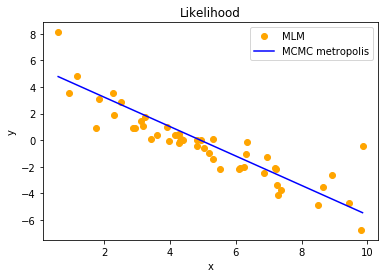

In [9]:
plt.plot(base[0],base[1], 'o', color='orange')
plt.plot(X,y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Likelihood')
plt.legend(('MLM', 'MCMC metropolis', 'datos'), loc='upper right')
plt.show()